<a href="https://colab.research.google.com/github/puck-arthur/data-learning/blob/main/notebooks/week3_classification_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Week 3 – Classification Models & Evaluation

1. **Dataset Selection & Notebook Setup**  
   - Choose a binary or multiclass classification dataset (e.g. the Student Depression dataset you saw earlier, the Titanic survival data, or another Kaggle set of your choice).  
   - Create a new Colab notebook `week03_classification_models.ipynb` and import your CSV into a DataFrame.

2. **Exploratory Data Analysis (EDA)**  
   - **Target distribution**: bar‐plot of class counts; check for imbalance.  
   - **Feature distributions**: histograms/boxplots for numeric features split by class.  
   - **Missing data**: count and visualize gaps; decide on drop vs. impute vs. “Missing” category.

3. **Preprocessing & Feature Engineering**  
   - **Encode categoricals**:  
     - Binary flags → 0/1  
     - Nominal → one-hot  
     - Ordinal → integer codes  
   - **Scale numeric features** if your models need it (e.g. KNN, SVM).  
   - **(Optional)** Create interaction or polynomial features if you want to explore nonlinearities.

4. **Train/Test Split & Baseline**  
   - Split into train/test (e.g. 80/20, with `stratify=target` if classes are imbalanced).  
   - As a quick baseline, train a **dummy classifier** (e.g. `strategy="most_frequent"`) and record its accuracy.

5. **Build Classification Models**  
   Fit at least three different models inside identical pipelines (preprocessing → model):  
   - **LogisticRegression** (with and without regularization)  
   - **DecisionTreeClassifier**  
   - **RandomForestClassifier** or **GradientBoostingClassifier**  
   *(Optional: try K-Nearest Neighbors or SVM)*

6. **Evaluation Metrics**  
   On the test set, compute and compare for each model:  
   - **Accuracy**  
   - **Precision, Recall, F1-score** (per class and macro-averaged)  
   - **ROC AUC** (binary or one-vs-rest for multiclass)  
   - **Confusion Matrix**

7. **Visual Diagnostics**  
   - **Confusion matrix heatmap** for each model.  
   - **ROC curve(s)** plotted together.  
   - **Precision-Recall curve** if your classes are imbalanced.  
   - **Feature importance** (for tree models) or **coefficient bar chart** (for logistic).

8. **Hyperparameter Tuning**  
   - Pick one model (e.g. RandomForest) and run a simple `GridSearchCV` over 2–3 key parameters.  
   - Compare tuned vs. untuned performance.

In [44]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adilshamim8/student-depression-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/student-depression-dataset


In [45]:
import pandas as pd

df_raw = pd.read_csv(path + '/student_depression_dataset.csv')

df_raw.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [46]:
# Leeeets make some EDA

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [47]:
# Should academic pressure, work pressure, study satisfaction, job satisfaction and work/study hours be ints?

selected_columns = ['Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours']

for column in selected_columns:
  print(f"Number of non-int values on column {column}: " + str((df_raw[column] % 1 != 0).sum()))


Number of non-int values on column Academic Pressure: 0
Number of non-int values on column Work Pressure: 0
Number of non-int values on column Study Satisfaction: 0
Number of non-int values on column Job Satisfaction: 0
Number of non-int values on column Work/Study Hours: 0


In [48]:
df_raw['Age'] = df_raw['Age'].astype('int')

for column in selected_columns:
  df_raw[column] = df_raw[column].astype('int')

In [49]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  int64  
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  int64  
 6   Work Pressure                          27901 non-null  int64  
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  int64  
 9   Job Satisfaction                       27901 non-null  int64  
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [50]:
df_raw.describe(include='all')

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27901.000000,27901,27901.000000,27901,27901,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901,27901,27901,27901,27901.000000,27901,27901,27901.000000
unique,NaN,2,NaN,52,14,NaN,NaN,NaN,NaN,NaN,5,4,28,2,NaN,6,2,NaN
top,NaN,Male,NaN,Kalyan,Student,NaN,NaN,NaN,NaN,NaN,'Less than 5 hours',Unhealthy,'Class 12',Yes,NaN,5.0,No,NaN
freq,NaN,15547,NaN,1570,27870,NaN,NaN,NaN,NaN,NaN,8310,10317,6080,17656,NaN,6715,14398,NaN
mean,70442.149421,NaN,25.822300,NaN,NaN,3.141214,0.000430,7.656104,2.943837,0.000681,NaN,NaN,NaN,NaN,7.156984,NaN,NaN,0.585499
std,40641.175216,NaN,4.905687,NaN,NaN,1.381465,0.043992,1.470707,1.361148,0.044394,NaN,NaN,NaN,NaN,3.707642,NaN,NaN,0.492645
min,2.000000,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,35039.000000,NaN,21.000000,NaN,NaN,2.000000,0.000000,6.290000,2.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,0.000000
50%,70684.000000,NaN,25.000000,NaN,NaN,3.000000,0.000000,7.770000,3.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,1.000000
75%,105818.000000,NaN,30.000000,NaN,NaN,4.000000,0.000000,8.920000,4.000000,0.000000,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,1.000000


In [51]:
# duplicated ids?
print(df_raw['id'].duplicated().sum())

0


In [52]:
# Lets see what possible values some text columns might have

text_columns = ['Gender', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Financial Stress']

for column_name in text_columns:
  print(df_raw[column_name].value_counts())

Gender
Male      15547
Female    12354
Name: count, dtype: int64
Profession
Student                     27870
Architect                       8
Teacher                         6
'Digital Marketer'              3
Chef                            2
'Content Writer'                2
Pharmacist                      2
Doctor                          2
'UX/UI Designer'                1
'Civil Engineer'                1
Manager                         1
'Educational Consultant'        1
Lawyer                          1
Entrepreneur                    1
Name: count, dtype: int64
Sleep Duration
'Less than 5 hours'    8310
'7-8 hours'            7346
'5-6 hours'            6183
'More than 8 hours'    6044
Others                   18
Name: count, dtype: int64
Dietary Habits
Unhealthy    10317
Moderate      9921
Healthy       7651
Others          12
Name: count, dtype: int64
Degree
'Class 12'    6080
B.Ed          1867
B.Com         1506
B.Arch        1478
BCA           1433
MSc           1190
B.T

In [53]:
# Most of the data is about Students, but some of them arent. I will remove them, since the data is about students
df_raw = df_raw[df_raw['Profession'] == 'Student']

# I will drop the Others sleep duration values too, since they are trash
df_raw = df_raw[df_raw['Sleep Duration'] != 'Others']

# Others dietary habits too
df_raw = df_raw[df_raw['Dietary Habits'] != 'Others']

# ? Financial stress too
df_raw = df_raw[df_raw['Financial Stress'] != '?']

# Also, financial stress should be a int column
df_raw['Financial Stress'] = df_raw['Financial Stress'].astype('float').astype('int') # Since the number is like 1.0 it can't go directly to int

# Some columns dont seem relevant, so I will remove them from the dataset
df_raw = df_raw.drop(columns=['City', 'Degree', 'Profession'])

df = df_raw.copy()

In [54]:
df.describe(include='all')

,id,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27837.000000,27837,27837.000000,27837.000000,27837.000000,27837.000000,27837.000000,27837.000000,27837,27837,27837,27837.000000,27837.000000,27837,27837.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,4,3,2,NaN,NaN,2,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,'Less than 5 hours',Unhealthy,Yes,NaN,NaN,No,NaN
freq,NaN,15511,NaN,NaN,NaN,NaN,NaN,NaN,8297,10300,17610,NaN,NaN,14364,NaN
mean,70447.556597,NaN,25.819772,3.140748,0.000431,7.656175,2.943385,0.000683,NaN,NaN,NaN,7.158889,3.139814,NaN,0.585192
std,40639.277239,NaN,4.906603,1.381791,0.044043,1.470791,1.361073,0.044445,NaN,NaN,NaN,3.706690,1.437217,NaN,0.492698
min,2.000000,NaN,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,NaN,0.000000
25%,35065.000000,NaN,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,NaN,NaN,NaN,4.000000,2.000000,NaN,0.000000
50%,70684.000000,NaN,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,NaN,NaN,NaN,8.000000,3.000000,NaN,1.000000
75%,105828.000000,NaN,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,NaN,NaN,NaN,10.000000,4.000000,NaN,1.000000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27837 entries, 0 to 27900
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27837 non-null  int64  
 1   Gender                                 27837 non-null  object 
 2   Age                                    27837 non-null  int64  
 3   Academic Pressure                      27837 non-null  int64  
 4   Work Pressure                          27837 non-null  int64  
 5   CGPA                                   27837 non-null  float64
 6   Study Satisfaction                     27837 non-null  int64  
 7   Job Satisfaction                       27837 non-null  int64  
 8   Sleep Duration                         27837 non-null  object 
 9   Dietary Habits                         27837 non-null  object 
 10  Have you ever had suicidal thoughts ?  27837 non-null  object 
 11  Work/St

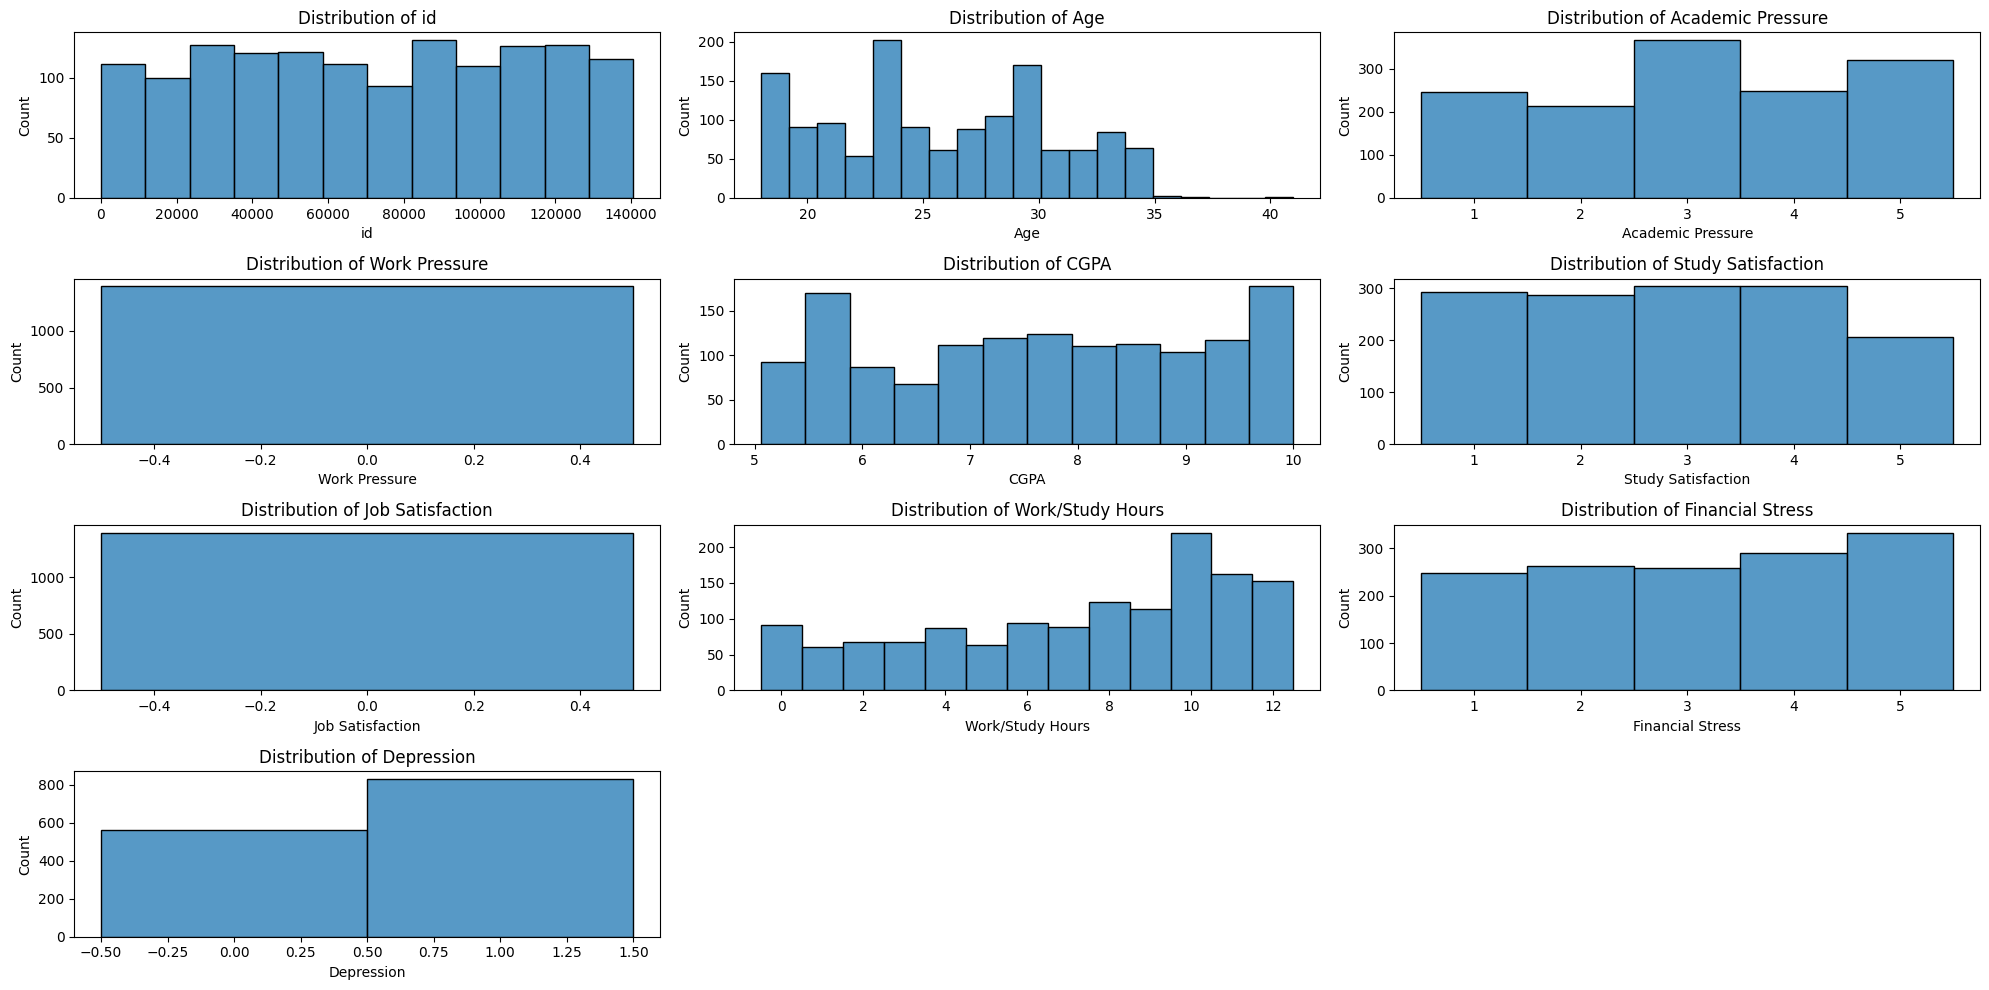

In [56]:
import matplotlib.pyplot as plt
import seaborn as sb
import math

# Code to visualize the histogram of all numerical values in the dataframe

numeric_columns = list(df.select_dtypes(include='number').dtypes.items()) # Tupples in the format (column_name, dtype)

sample = df.sample(frac=0.8, random_state=0)  # for large datasets

num_columns = 3
num_rows = math.ceil(len(numeric_columns) / num_columns)

plt.figure(figsize=(20, 10))

i = 0

for column_name, dtype in numeric_columns:

  # Checking if the histogram should be discrete
  n_uniques = df[column_name].nunique()
  discrete = ((dtype == 'int64') & (n_uniques < 20)) # if is integer with fewer than 20 values, discrete==True

  # Plotting
  plt.subplot(num_rows, num_columns, i + 1)
  sb.histplot(
      data=sample,
      x=column_name,
      #kde=True, #Only if data is small
      discrete=discrete
  )
  plt.title(f'Distribution of {column_name}')
  i+=1 # go to next item in the subplot

plt.tight_layout()
plt.show()

In [ ]:
# Lets create our preprocessing pipeline
